[Ref.] https://velog.io/@tobigs_xai/2주차-SHAP-SHapley-Additive-exPlanation

In [71]:
!pip3 install shap

In [72]:
import tensorflow as tf
import numpy as np
import shap

In [73]:
shap.__version__

'0.40.0'

In [74]:
##########################################
tf.compat.v1.disable_v2_behavior()
##########################################

In [75]:
# 1. dataset 불러오기  
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # image scaling : (0,1) 범위로 바꿔주기 

In [76]:
# 2. model 구성하기 
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [77]:
# 3. model 학습과정 설정하기 
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [78]:
# 4. model 학습
model.fit(x_train, y_train, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 6s 92us/sample - loss: 0.2998 - acc: 0.9126
Epoch 2/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1428 - acc: 0.9566
Epoch 3/3
60000/60000 [==============================] - 5s 89us/sample - loss: 0.1095 - acc: 0.9672


In [79]:
# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

In [80]:
# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)

# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


In [81]:
# shap_values = e.shap_values(x_test[:5])
shap_values = e.shap_values(x_test[:5], check_additivity=False)

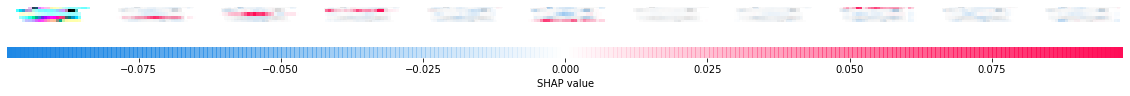

In [82]:
# plot the feature attributions
shap.image_plot(shap_values, -x_test[:5])

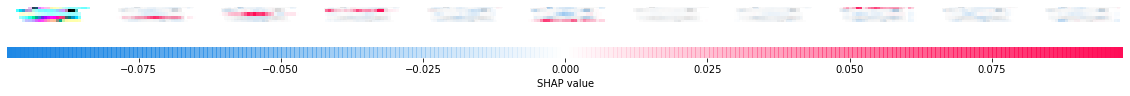

None

In [84]:
# plot the feature attributions
shap_plot = shap.image_plot(shap_values, -x_test[:5])
# shap_plot = shap.image_plot(shap_values, x_test)
display(shap_plot)